<a href="https://colab.research.google.com/github/satishgunjal/Machine_Learning_Tutorials/blob/master/04_Train_Test_Split/Train_Test_Data_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![train_test_split_header_640x480.png](https://raw.githubusercontent.com/satishgunjal/images/master/train_test_split_header_640x480.png)
 
In machine learning we build model based on given data, but to test the performance of the model we also need test data. Technically we can use the same data for model performance testing but the results won't be reliable. Recommended way is to use the different set of data for model training and model performance testing. Datasets used for model training are called as 'Training Datasets' and datasets used for testing are called as 'Test Datasets'
 
 
## Train and Test Datasets
We usually do 80-20 split for training and test datasets. Its is also good practice to randomly sort the data before splitting into two datasets. We are going to use Sklearn library (model_selection.train_test_split) for splitting the datasets.
 
![train_test_split.png](https://raw.githubusercontent.com/satishgunjal/images/master/train_test_split.png)



## Python Code

### Import Libraries
* pandas: Used for data manipulation and analysis.
* train_test_split: Sklearn train_test_split is used to split the dataset
* linear_model: Sklearn linear regression model



In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Import Dataset

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Fish_Weight_Train_Test_Split.csv')
print('Dimension of dataset= ', df.shape)
df.head(5) # Show first 5 training examples

Dimension of dataset=  (42, 3)


,Weight,Height,Width
0,242.0,11.5200,4.0200
1,290.0,12.4800,4.3056
2,340.0,12.3778,4.6961
3,363.0,12.7300,4.4555
4,450.0,13.6024,4.9274


### Understanding The Dataset
* There are total 42 rows(training samples) and 4 columns in dataset.
* Features/input values/independent variables are ‘Height’ and ‘Width’
* Labels/Target/output value/dependent variable is ‘Weight’
 
Let's create separate dataframe for features and labels. It is required for splitting the dataset.

In [13]:
X = df.drop(['Weight'], axis='columns')
X.head(5)

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,13.6024,4.9274


In [14]:
y = df.Weight
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    450.0
Name: Weight, dtype: float64

Now we have features and target variables ready, lets split the data into training and test datasets

### Using Sklearn train_test_split Method
* train_test_split() method takes three arguments input features, labels and test_size. 
* Test size determines the percentage of split. e.g. test_size = 0.2, means 80% training data and 20% test data.
* random_state is optional argument.

### What Is random_state
* It is used for initializing the internal random number generator, which will decide the splitting of data into train and test datasets
* Order of the data will be same for a particular value of random_state. For e.g. for 'random_state=1' no matter how many times you run the code you will get same data in training and test split
* You can use any integer value for random_state. Just remember one thing if you don't pass any value, then it will use default value 'None' and split data randomly every time you execute the code.


 


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (33, 2)
X_test dimension=  (9, 2)
y_train dimension=  (33,)
y_train dimension=  (9,)


Lets visulaize the training and test data using scatter plot

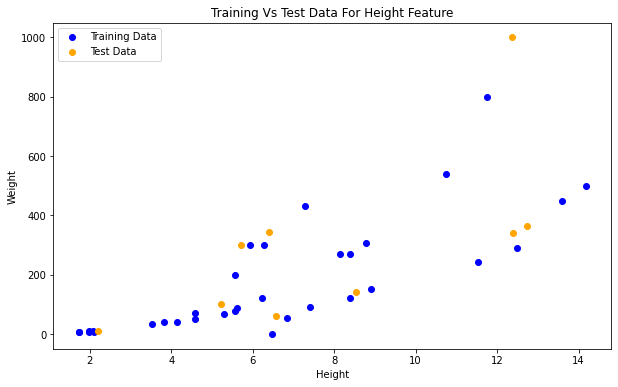

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_train.Height,y_train, color='blue', label='Training Data')
plt.scatter(X_test.Height,y_test, color='orange', label='Test Data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Training Vs Test Data For Height Feature')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()

### What Is random_state
* It is used for initializing the internal random number generator, which will decide the splitting of data into train and test datasets
* Order of the data will be same for a particular value of random_state. For e.g. for 'random_state=1' no matter how many times you run the code you will get same data in training and test split
* You can use any integer value for random_state. Just remember one thing if you don't pass any value, then it will use default value 'None' and split data randomly every time you execute the code.
 



### Linear Model Training Using Training Dataset
Since we have training and test dataset ready, lets use training dataset for linear model training.

In [26]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Linear Model Testing Using Test Dataset
Lets use test dataset for linear model performance testing.

In [27]:
lm.score(X_test, y_test)

0.7153810385773975

### Linear Model Testing Using Training Dataset
Lets use training dataset for linear model performance testing. Notice the difference in performance score.

In [28]:
lm.score(X_train, y_train)

0.8488919680474343

### Never Test On Training Data
* As you can notice score with training data is higher than score with test data.
* Higher score is misleading in this case.
* Model which dont use separate dataset for testing may have higher performance score but it wont generalize well and give misleading predictions with real world data.

Hence, forward in all the tutorials we are going to use training and test dataset for model training and testing.